In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Your code follows below...


In [5]:
# Load your dataset
data = pd.read_csv('/content/water_potability.csv')

In [6]:
import matplotlib.pyplot as plt
def bar_plot(variable):
    '''
    input: variable
    output: bar plot & value count
    '''
    # Get the specified feature
    var = data[variable]
    # Count the number of categorical variable (value/sample)
    var_value = var.value_counts()
    # Visualize the bar plot
    plt.figure(figsize=(6, 3))
    plt.bar(var_value.index, var_value, width=1 / (var.unique().size))
    plt.xticks(var_value.index, var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    # Print the value count
    print("{}: \n {}".format(variable, var_value))

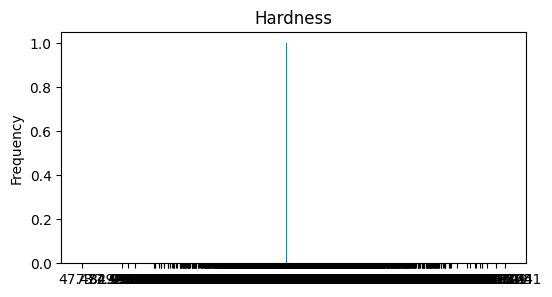

Hardness: 
 204.890456    1
134.560276    1
170.190912    1
237.461099    1
171.238925    1
             ..
218.237187    1
208.374188    1
142.145566    1
179.799917    1
195.102299    1
Name: Hardness, Length: 3276, dtype: int64


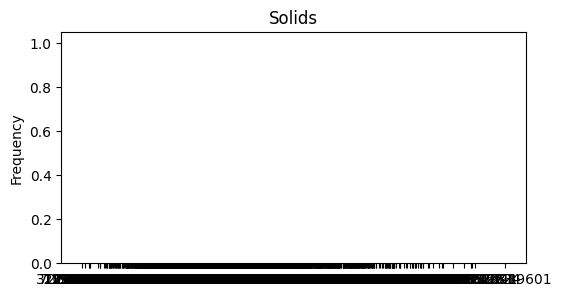

Solids: 
 20791.31898    1
15979.33479    1
37000.95567    1
18736.19090    1
12289.90092    1
              ..
22824.69947    1
21809.70983    1
45141.68604    1
17037.72537    1
17404.17706    1
Name: Solids, Length: 3276, dtype: int64


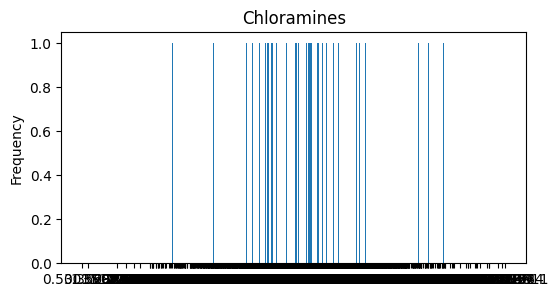

Chloramines: 
 7.300212     1
9.504361     1
6.217223     1
5.599870     1
10.786500    1
            ..
8.696479     1
5.846112     1
6.030640     1
6.378364     1
7.509306     1
Name: Chloramines, Length: 3276, dtype: int64


In [ ]:
# Create bar plots for a list of categorical variables
category1 = ["Hardness", "Solids", "Chloramines"]
for c in category1:
    bar_plot(c)

In [7]:
# Display information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


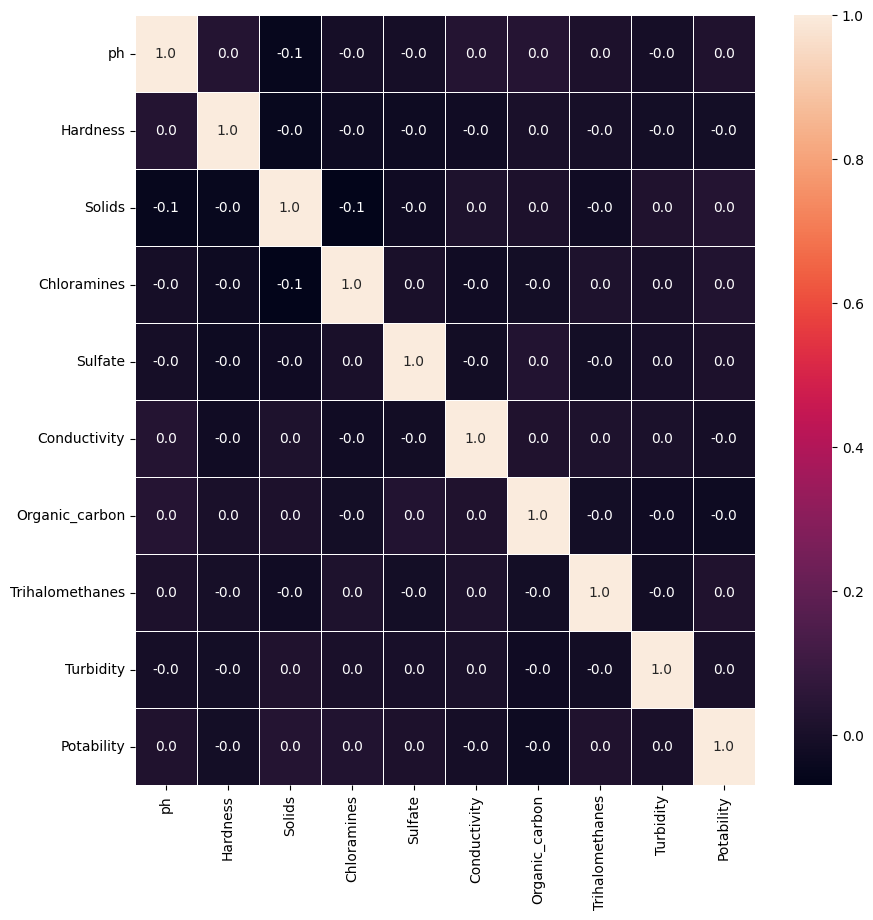

In [8]:
# Create a heatmap to visualize the correlation between numeric features in the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a heatmap with correlations, annotations, and formatting
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, fmt='.1f', ax=ax)

# Show the heatmap
plt.show()


In [9]:
data=data.drop_duplicates()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
print(data[data['Hardness']==0].shape[0])
print(data[data['Solids']==0].shape[0])
print(data[data['Chloramines']==0].shape[0])
print(data[data['Sulfate']==0].shape[0])
print(data[data['Conductivity']==0].shape[0])

0
0
0
781
0


In [13]:
# Define the features (X) and the target variable (y)
x = data.drop("Potability", axis=1)
y = data.Potability

# Print the features (X) and the target variable (y)
print(x)
print(y)

            ph    Hardness       Solids  Chloramines     Sulfate  \
0     0.000000  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246    0.000000   
2     8.099124  224.236259  19909.54173     9.275884    0.000000   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362    0.000000   
3273  9.419510  175.762646  33155.57822     7.350233    0.000000   
3274  5.126763  230.603758  11983.86938     6.303357    0.000000   
3275  7.874671  195.102299  17404.17706     7.509306    0.000000   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076  

In [14]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
# Print the shapes of the training and testing sets for features (X) and target variable (y)
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (2293, 9)
x test:  (983, 9)
y train:  (2293,)
y test:  (983,)


In [16]:
# Create a Logistic Regression model with specified parameters
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state=42, max_iter=200)

# Fit the model on the training data and calculate test and train accuracy
test_accuracy = logreg.fit(x_train, y_train).score(x_test, y_test)
train_accuracy = logreg.fit(x_train, y_train).score(x_train, y_train)

# Print the test and train accuracy
print("Test Accuracy: {} ".format(test_accuracy))
print("Train Accuracy: {} ".format(train_accuracy))

Test Accuracy: 0.6276703967446592 
Train Accuracy: 0.6018316615787178 


In [17]:
# Predict on the test data and calculate the confusion matrix
y_pred = logreg.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred)

[Text(0, 0.5, 'Potability'), Text(0, 1.5, 'not_Potability')]

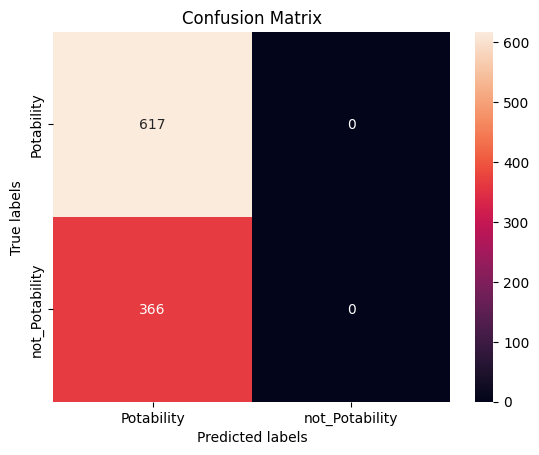

In [18]:
# Create a heatmap of the confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# Set labels and title for the confusion matrix plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Potability', 'not_Potability'])
ax.yaxis.set_ticklabels(['Potability', 'not_Potability'])


In [19]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

# SVM
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Print confusion matrices and classification reports
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

Logistic Regression Accuracy: 0.6276703967446592
SVM Accuracy: 0.6276703967446592
Logistic Regression Confusion Matrix:
 [[617   0]
 [366   0]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983

SVM Confusion Matrix:
 [[617   0]
 [366   0]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

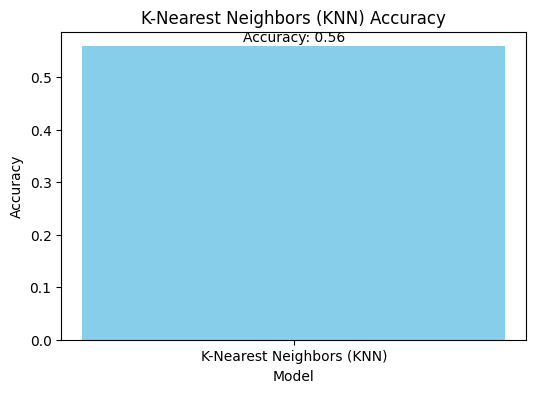

In [20]:

from sklearn.neighbors import KNeighborsClassifier
# Create and train the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict on the test data and calculate accuracy for KNN
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Create a bar chart for KNN accuracy
model_names = ["K-Nearest Neighbors (KNN)"]
accuracies = [accuracy_knn]
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

plt.figure(figsize=(6, 4))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.title("K-Nearest Neighbors (KNN) Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.text(0, accuracy_knn + 0.01, f"Accuracy: {accuracy_knn:.2f}", ha='center')
plt.show()

In [21]:
# Import necessary libraries and modules
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on the test data and calculate accuracy
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6280487804878049


In [22]:
# Import necessary libraries and modules for cross-validation and grid search
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Import SVM classifier, classification metrics, and evaluation metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [23]:
# Create an SVM model
model = SVC()

# Define hyperparameter grid for grid search
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [24]:
# Create a dictionary representing the hyperparameter grid
grid = dict(kernel=kernel, C=C, gamma=gamma)

# Create a cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform grid search with the specified settings
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1', error_score=0)

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv('/content/water_potability.csv')

# Identify categorical columns
categorical_columns = ["ph","Solids"]

# Apply one-hot encoding to these columns
data = pd.get_dummies(data, columns=categorical_columns)

# Define features (X) and the target variable (y)
X = data.drop("Potability", axis=1)
y = data["Potability"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Predict on the test data and calculate accuracy
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the Perceptron model
print("Accuracy of Perceptron:", accuracy)


Accuracy of Perceptron: 0.3719512195121951


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('/content/water_potability.csv')

# List of categorical variables to one-hot encode
categorical_vars = ["ph","Solids"]

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=categorical_vars)

# Split the data into features (x) and target (y)
x = data.drop("Potability", axis=1)
y = data["Potability"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predict on the test data and calculate accuracy for Logistic Regression
y_pred_logreg = logreg.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Create and train an SVM model
svm = SVC()
svm.fit(x_train, y_train)

# Predict on the test data and calculate accuracy for SVM
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Create and train a K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict on the test data and calculate accuracy for KNN
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_knn)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6021341463414634
SVM Accuracy: 0.6280487804878049
K-Nearest Neighbors (KNN) Accuracy: 0.5884146341463414


k=1, Accuracy=0.5354
k=2, Accuracy=0.5827
k=3, Accuracy=0.5479
k=4, Accuracy=0.5891
k=5, Accuracy=0.5699
k=6, Accuracy=0.5974
k=7, Accuracy=0.5745
k=8, Accuracy=0.5940
k=9, Accuracy=0.5818
k=10, Accuracy=0.5959
k=11, Accuracy=0.5788
k=12, Accuracy=0.5940
k=13, Accuracy=0.5922
k=14, Accuracy=0.5986
k=15, Accuracy=0.5965
k=16, Accuracy=0.6059
k=17, Accuracy=0.5962
k=18, Accuracy=0.6087
k=19, Accuracy=0.6102
k=20, Accuracy=0.6102


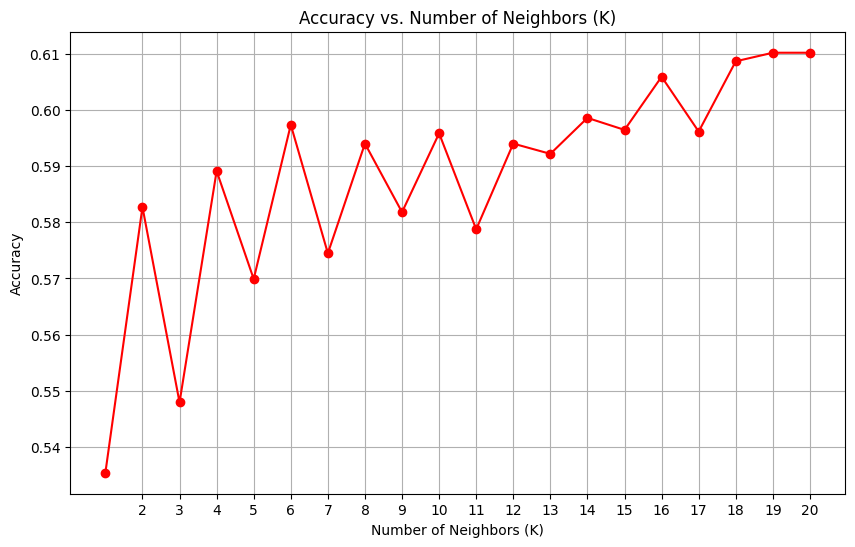

highest accuracy: 0.6102048035747532


In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
a=pd.read_csv('/content/water_potability.csv')
x = data.drop("Potability",axis=1)
y = data.Potability
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
accuracy_scores = []
k_values = list(range(1, 21))
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, x, y, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    accuracy_scores.append(mean_accuracy)
max=np.max(accuracy_scores)
for k, accuracy in zip(k_values, accuracy_scores):
    print(f'k={k}, Accuracy={accuracy:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='r')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(2, 21, step=1))
plt.grid(True)
plt.show()
print("highest accuracy:",max)

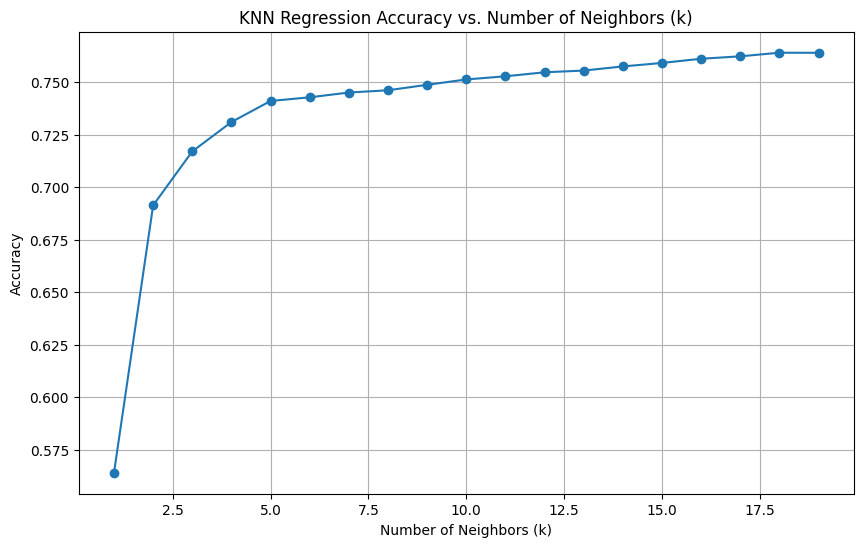

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the range of k values to test
k_values = range(1, 20)

# Create and train a KNN regression model for each k
accuracy_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)

    # Calculate accuracy (inverse of MSE)
    mse = mean_squared_error(y_test, y_pred_knn)
    accuracy = 1 - mse
    accuracy_values.append(accuracy)

# Plot the accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('KNN Regression Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()